<a href="https://colab.research.google.com/github/anitharahul01/anitha/blob/main/clustering_assaigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Assignment on Clustering
#Try out different clustering models in the given dataset. Find the optimum number
#of clusters in each model and create the model with the optimum number of clusters

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/Wine_clust.csv")
# If there's a label column, drop it before clustering
X = df.drop(columns=["label"], errors="ignore")
X_scaled = StandardScaler().fit_transform(X)

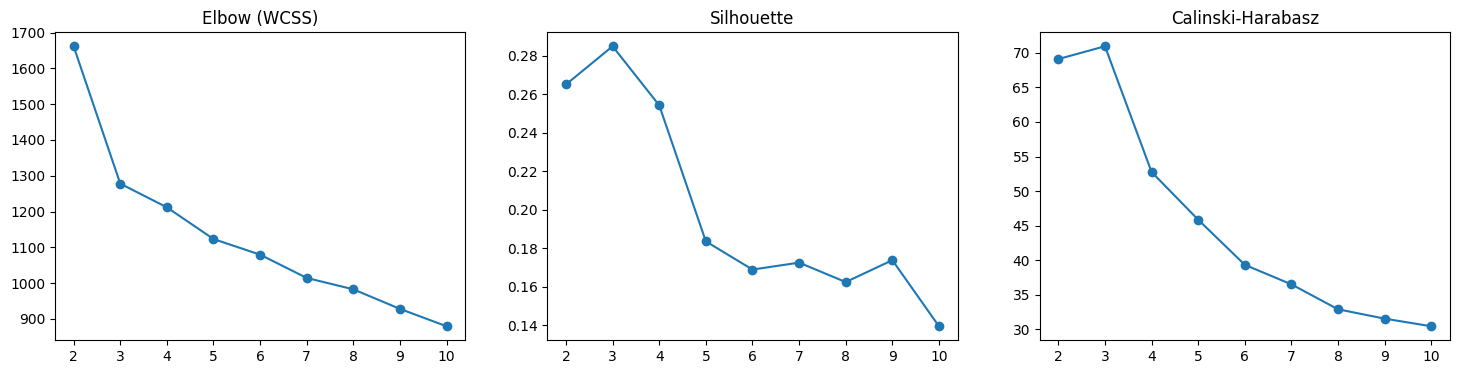

In [14]:
#Determine Optimal k for K-Means
#Elbow method (WCSS)
#Silhouette score
#Calinski-Harabasz index

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

wcss, sil, ch = [], [], []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    labels = km.labels_
    wcss.append(km.inertia_)
    sil.append(silhouette_score(X_scaled, labels))
    ch.append(calinski_harabasz_score(X_scaled, labels))

fig, ax = plt.subplots(1,3, figsize=(18,4))
ax[0].plot(K_range, wcss, marker='o'); ax[0].set_title("Elbow (WCSS)")
ax[1].plot(K_range, sil, marker='o'); ax[1].set_title("Silhouette")
ax[2].plot(K_range, ch, marker='o'); ax[2].set_title("Calinski-Harabasz")
plt.show()

In [15]:
# Fit Final K-Means with Optimal k

best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42).fit(X_scaled)
df["KMeans_cluster"] = kmeans_final.labels_

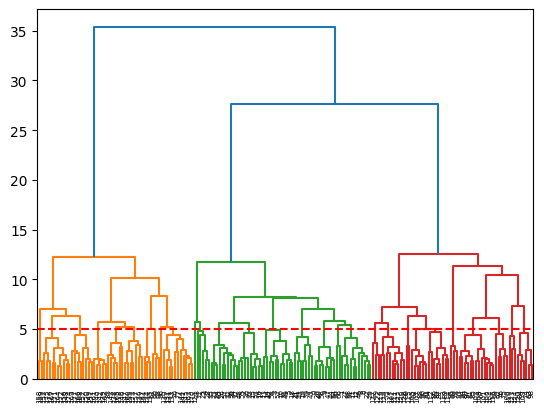

In [16]:
# Agglomerative (Hierarchical) Clustering

from sklearn.cluster import AgglomerativeClustering

# Use dendrogram to estimate optimal clusters
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

# Suppose dendrogram suggests 3
agg = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_scaled)
df["Agg_cluster"] = agg.labels_

In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def eval_clusters(X, labels):
    return {
        "silhouette": silhouette_score(X, labels),
        "calinski_harabasz": calinski_harabasz_score(X, labels),
        "davies_bouldin": davies_bouldin_score(X, labels)
    }

results = {
    "KMeans": eval_clusters(X_scaled, df["KMeans_cluster"]),
    "Agglomerative": eval_clusters(X_scaled, df["Agg_cluster"]),
    # add spectral, medoids similarly
}
pd.DataFrame(results).T

,silhouette,calinski_harabasz,davies_bouldin
KMeans,0.284859,70.940008,1.389188
Agglomerative,0.277444,67.647468,1.418592
